## Imports

In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import spectral.io.envi as envi
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_digits
from sklearn.model_selection import KFold, learning_curve, ShuffleSplit, GridSearchCV
# from yellowbrick.model_selection import RFECV
from time import time
# from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from time import process_time
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing
# from tensorflow.keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import Dense

# print(tf.__version__)

In [ ]:
import sklearn
cv2.__version__

'4.1.2'

## Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Thesis/mean_dataset/normalized/dataset_mean_normalized.csv', encoding='latin-1')
# dataset.head(3)
columns = dataset.iloc[:, 2:].columns.values

In [ ]:
X = np.load('/content/drive/MyDrive/Thesis/dataset/segmented_normalized_one_tenth/X.npy')

In [ ]:
y = np.load('/content/drive/MyDrive/Thesis/dataset/segmented_normalized_one_tenth/y.npy')

### learning curve based on number of samples

In [ ]:
# source of code @ scikit learn
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#### 10 percent of data

In [ ]:
X.shape

(841005, 186)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


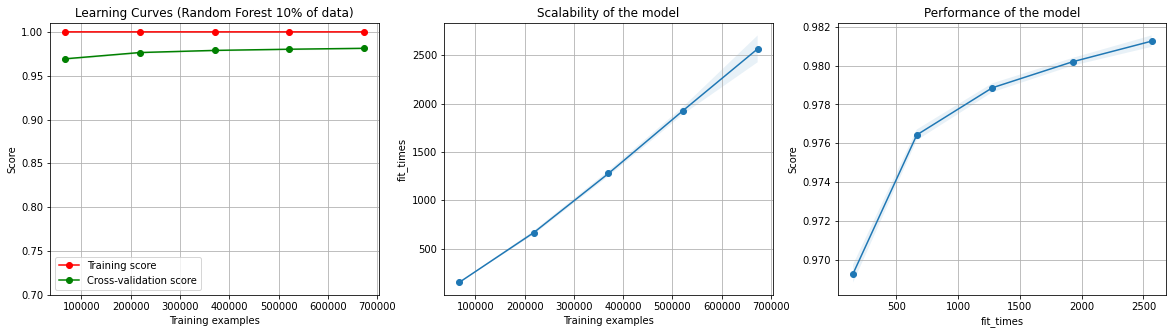

In [ ]:
title = r"Learning Curves (Random Forest 10% of data)"
# RF is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

#### get only 1% of dataset

In [ ]:
X = X[::10, :]
y = y[::10]

In [ ]:
X.shape

(84101, 186)

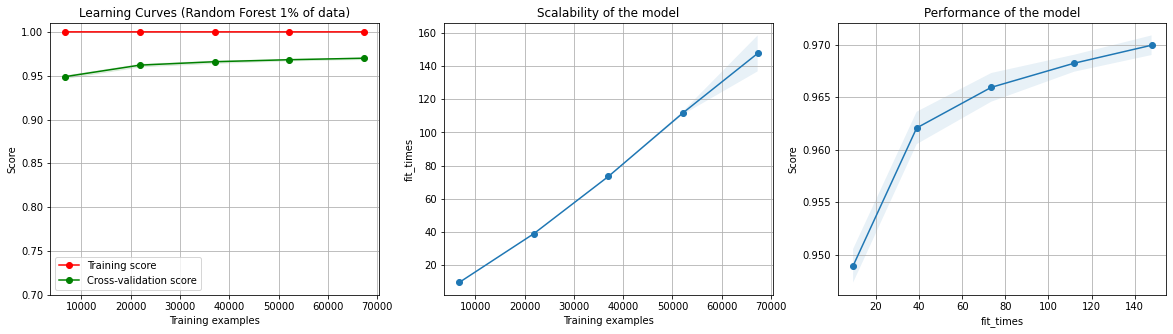

In [ ]:
title = r"Learning Curves (Random Forest 1% of data)"
# RF is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

#### 0.1% of data

In [ ]:
X = X[::10, :]
y = y[::10]
X.shape

(8411, 186)

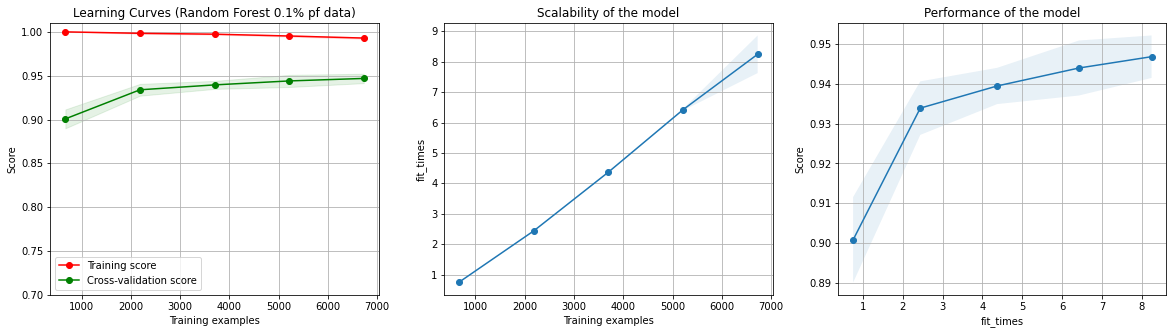

In [ ]:
title = r"Learning Curves (Random Forest 0.1% pf data)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()

## number of trees

In [ ]:
X = X[::10, :]
y = y[::10]
X.shape

(84101, 186)

#### select optimal number of estimators (trees)

In [ ]:
num_of_folds = 5

train_scores_m_arr = np.array([])
train_scores_st_arr = np.array([])
val_scores_m_arr = np.array([])
val_scores_st_arr = np.array([])

duration = np.array([])

for i in range(5, 215, 15):

  # record starting time
  tic = process_time()

  # instantiate cross_validation instance
  kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

  train_scores = np.array([])
  val_scores = np.array([])

  for train_index, val_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # clf = random forest
    clf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)

    train_scores = np.append(train_scores, train_score)
    val_scores = np.append(val_scores, val_score)

  train_scores_mean = np.mean(train_scores)
  train_scores_std = np.std(train_scores)
  val_scores_mean = np.mean(val_scores)
  val_scores_std = np.std(val_scores)

  train_scores_m_arr = np.append(train_scores_m_arr, train_scores_mean)
  train_scores_st_arr = np.append(train_scores_st_arr, train_scores_std)
  val_scores_m_arr = np.append(val_scores_m_arr, val_scores_mean)
  val_scores_st_arr = np.append(val_scores_st_arr, val_scores_std)

  # record ending time
  toc = process_time()
  runtime_duration = toc - tic

  duration = np.append(duration, runtime_duration)
  print(i)

In [ ]:
steps = np.arange(5, 215, 15)
df = pd.DataFrame(data=steps, columns=['number_of_trees'])
df.insert(loc=1, column='train_mean', value=train_scores_m_arr, allow_duplicates=True)
df.insert(loc=2, column='train_std', value=train_scores_st_arr, allow_duplicates=True)
df.insert(loc=3, column='val_mean', value=val_scores_m_arr, allow_duplicates=True)
df.insert(loc=4, column='val_std', value=val_scores_st_arr, allow_duplicates=True)
df.insert(loc=5, column='time_sec', value=duration, allow_duplicates=True)

# save learning curve into a csv file
df.to_csv('/content/drive/MyDrive/Thesis/results/wrappers/RF_estimators_selection.csv')

In [ ]:
df

,number_of_trees,train_mean,train_std,val_mean,val_std,time_sec
0,5,0.995526,0.000166,0.957123,0.002897,36.241094
1,20,0.999637,0.000076,0.966707,0.002690,152.105668
2,35,0.999920,0.000007,0.967480,0.002272,264.566181
3,50,0.999967,0.000006,0.968954,0.001835,384.274284
4,65,0.999994,0.000012,0.969037,0.002304,494.921423
5,80,0.999997,0.000006,0.969549,0.001849,609.267987
6,95,0.999994,0.000007,0.969501,0.001958,718.085451
7,110,1.000000,0.000000,0.969334,0.002003,833.492821
8,125,1.000000,0.000000,0.969453,0.001925,957.546035
9,140,1.000000,0.000000,0.969442,0.002187,1074.684479


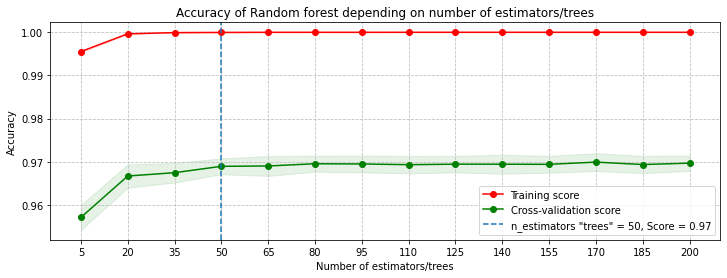

In [ ]:
steps = np.arange(5, 215, 15)
plt.figure(figsize=(12, 4))
plt.fill_between(steps, train_scores_m_arr - train_scores_st_arr,
                 train_scores_m_arr + train_scores_st_arr, alpha=0.1, color="r")
plt.fill_between(steps, val_scores_m_arr - val_scores_st_arr,
                 val_scores_m_arr + val_scores_st_arr, alpha=0.1, color="g")
plt.plot(steps, train_scores_m_arr, 'o-', color="r", label="Training score")
plt.plot(steps, val_scores_m_arr, 'o-', color="g", label="Cross-validation score")
plt.axvline(x=50, ls='--', label='n_estimators "trees" = {}, Score = {}'.format(50, round(val_scores_m_arr.max(), 2)))
plt.xticks(np.arange(5, 215, 15))
plt.xlabel("Number of estimators/trees")
plt.ylabel("Accuracy")
plt.title("Accuracy of Random forest depending on number of estimators/trees")
plt.grid(b=True, which='major', color='silver', linestyle='--')
plt.legend(loc="best")
plt.show()

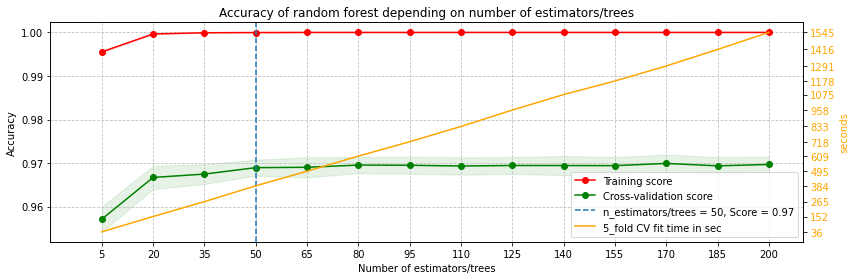

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))

steps = np.arange(5, 215, 15)
# plt.figure(figsize=(12, 4))
ax1.fill_between(steps, train_scores_m_arr - train_scores_st_arr,
                 train_scores_m_arr + train_scores_st_arr, alpha=0.1, color="r")
ax1.fill_between(steps, val_scores_m_arr - val_scores_st_arr,
                 val_scores_m_arr + val_scores_st_arr, alpha=0.1, color="g")
ax1.plot(steps, train_scores_m_arr, 'o-', color="r", label="Training score")
ax1.plot(steps, val_scores_m_arr, 'o-', color="g", label="Cross-validation score")
ax1.axvline(x=50, ls='--', label='n_estimators/trees = {}, Score = {}'.format(50, round(val_scores_m_arr.max(), 2)))
ax1.set_xticks(np.arange(5, 215, 15))
ax1.set_xlabel("Number of estimators/trees")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy of random forest depending on number of estimators/trees")
ax1.plot(0, 1, color='orange', label="5_fold CV fit time in sec")
ax1.grid(b=True, which='major', color='silver', linestyle='--')
ax1.legend(loc="best")

ax2 = ax1.twinx()
ax2.set_yticks(ticks=duration)
ax2.set_ylabel('seconds', color='orange')
ax2.plot(np.arange(5, 215, 15), duration, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.show()

## RF

In [ ]:
clf = RandomForestClassifier(n_jobs=-1)

In [ ]:
%%time
sfs1 = sfs(clf, 
           k_features=40, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

sfs1 = sfs1.fit(digitized_X, y, custom_feature_names=columns)

filename = '/content/drive/MyDrive/Thesis/results/wrappers/RF_wrapper.sav'
pickle.dump(sfs1, open(filename, 'wb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 186 out of 186 | elapsed: 27.4min finished

[2021-04-03 18:35:07] Features: 1/40 -- score: 0.7157347551447673[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 185 out of 185 | elapsed: 37.5min finished

[2021-04-03 19:12:40] Features: 2/40 -- score: 0.776648889075508[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 184 out of 184 | elapsed: 47.1min finished

[2021-04-03 19:59:47] Features: 3/40 -- score: 0.842593

CPU times: user 2min 54s, sys: 18.5 s, total: 3min 12s
Wall time: 18h 11min 5s


### pickle instance of FFS for later use due to colab time limits

In [ ]:
sfs1

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
# save the wrapper file to drive
filename = '/content/drive/MyDrive/Thesis/results/wrappers/RF_wrapper_transferedData.sav'
pickle.dump(sfs1, open(filename, 'wb'))

In [ ]:
# read the wrapper file from drive
# filename = '/content/drive/MyDrive/Thesis/results/wrappers/RF_wrapper2.sav'
# sfs1 = pickle.load(open(filename, 'rb'))

In [ ]:
sfs1.k_feature_idx_

(18, 29, 30, 32, 48, 58, 59, 78, 86, 87, 89, 91, 92, 94, 174)

In [ ]:
sfs1.k_feature_names_

('Band_019',
 'Band_030',
 'Band_031',
 'Band_033',
 'Band_049',
 'Band_059',
 'Band_060',
 'Band_079',
 'Band_087',
 'Band_088',
 'Band_090',
 'Band_092',
 'Band_093',
 'Band_095',
 'Band_175')

In [ ]:
df_result = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
# df_result.to_csv('/content/drive/MyDrive/Thesis/models/LR_wrapper_one_percent.csv')
df_result

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(18,)","[0.7070923250698532, 0.6823424494649227, 0.690...",0.715735,"(Band_019,)",0.0379576,0.0295323,0.0147662
2,"(18, 89)","[0.8284287497770644, 0.6778834720570749, 0.720...",0.776649,"(Band_019, Band_090)",0.090691,0.0705607,0.0352803
3,"(18, 78, 89)","[0.8877593484335058, 0.8122473246135553, 0.839...",0.842593,"(Band_019, Band_079, Band_090)",0.0357557,0.0278191,0.0139096
4,"(18, 78, 89, 91)","[0.9279472088460853, 0.8312722948870392, 0.877...",0.884293,"(Band_019, Band_079, Band_090, Band_092)",0.0408364,0.0317721,0.015886
5,"(18, 48, 78, 89, 91)","[0.9284822543249509, 0.8759215219976219, 0.934...",0.913021,"(Band_019, Band_049, Band_079, Band_090, Band_...",0.0275368,0.0214245,0.0107123
6,"(18, 48, 78, 89, 91, 174)","[0.9363295880149812, 0.8755053507728894, 0.942...",0.920072,"(Band_019, Band_049, Band_079, Band_090, Band_...",0.0347453,0.027033,0.0135165
7,"(18, 48, 78, 89, 91, 94, 174)","[0.9435824267284941, 0.8712841854934602, 0.947...",0.924888,"(Band_019, Band_049, Band_079, Band_090, Band_...",0.0396197,0.0308255,0.0154127
8,"(18, 48, 58, 78, 89, 91, 94, 174)","[0.9385292194280959, 0.8817479191438763, 0.950...",0.929275,"(Band_019, Band_049, Band_059, Band_079, Band_...",0.0332749,0.025889,0.0129445
9,"(18, 30, 48, 58, 78, 89, 91, 94, 174)","[0.936389037512633, 0.8843043995243758, 0.9527...",0.93207,"(Band_019, Band_031, Band_049, Band_059, Band_...",0.0331484,0.0257906,0.0128953
10,"(18, 30, 48, 58, 78, 86, 89, 91, 94, 174)","[0.9412638963200761, 0.8869203329369798, 0.957...",0.935577,"(Band_019, Band_031, Band_049, Band_059, Band_...",0.0341688,0.0265845,0.0132922


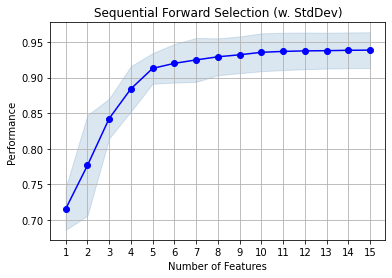

In [ ]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

# plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
# ordered list of selected bands
ordered_list = list(set(df_result.feature_names.values[0]))
for i in range(5):
  band = list(set(df_result.feature_names.values[i+1]) - set(df_result.feature_names.values[i]))
  ordered_list.append(band[0])

ordered_list

['Band_013', 'Band_091', 'Band_079', 'Band_039', 'Band_092', 'Band_031']

In [ ]:
# sorted list of selected bands
sorted_list = list(df_result.feature_names[len(df_result.feature_names)])
sorted_list

['Band_013', 'Band_031', 'Band_039', 'Band_079', 'Band_091', 'Band_092']

#### test

In [ ]:
# getting list of cropped reference images
source_file = '/content/drive/MyDrive/Thesis/source/VNIR_img.txt'
img_list = []
with open(source_file, "r") as listOfImages:
    for line in listOfImages:
        to_lower = str(line.strip()).lower() # make lower case to match reference imgs name
        img_list.append(to_lower)
        
print(len(img_list))

12


In [ ]:
ref = pd.read_csv('/content/drive/MyDrive/Thesis/files/img_labels.csv', encoding='latin-1')
ref.insert(loc=1, column='ref', value=img_list)
ref.head(3)

,Img_name,ref,PCR
0,Ind-AT1_V1-A_Blatt_VNIR,ind-at1_v1-a_blatt_vnir,1
1,Ind-AT1_V1-B_Blatt_VNIR,ind-at1_v1-b_blatt_vnir,1
2,Ind-AT1_V1-C_Blatt_VNIR,ind-at1_v1-c_blatt_vnir,1


In [ ]:
selected_fatures_idx

[12, 13, 30, 32, 43, 59, 64, 66, 93, 94, 104, 109, 168]

In [ ]:
for i in range(12):
  X_pre = np.zeros((2270, 1270, len(selected_fatures_idx)))
  img = np.load('/content/drive/MyDrive/Thesis/cropped_imgs/'+ ref.Img_name[i] +'.npy')
  for ch in range(len(selected_fatures_idx)):
    X_pre[:, :, ch:ch+1] = img[:, :, selected_fatures_idx[ch]:selected_fatures_idx[ch]+1]

  X_pre = X_pre.reshape(2270 * 1270, len(selected_fatures_idx))
  predicted = clf.predict(X_pre)
  predicted = np.reshape(predicted, (2270, -1))

  ref_img = np.load('/content/drive/MyDrive/Thesis/reference_img/cropped/'+ str(ref.ref[i]) +'.npy')
  ref_img[ref_img>0] = 1

  predicted_ref = predicted * ref_img
  predicted_ref = predicted_ref.reshape(2270, 1270, 1)

  rgb = np.zeros([2270, 1270, 3])
  rgb[:, :, 0:1] = img[:,:, 45:46].reshape((2270, 1270, 1)) + predicted_ref
  rgb[:, :, 1:2] = img[:,:, 120:121].reshape((2270, 1270, 1))
  rgb[:, :, 2:3] = img[:,:, 76:77].reshape((2270, 1270, 1))

  rgb = rgb / np.max(rgb)

  plt.title('LR based prediction  ' + ref.Img_name[i])
  plt.imsave('/content/drive/MyDrive/Thesis/predicted/FFS_LR_1percent_data_13bands/LR_predicted' + ref.Img_name[i] + '.png', rgb)

  print(i)

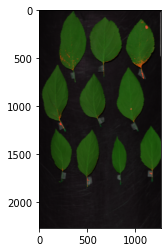

In [ ]:
plt.imshow(rgb)

In [ ]:
# restart runtime and clear ram
import os, signal
os.kill(os.getpid(), signal.SIGKILL)